### Project Description
##### Clustering the Countries by using Unsupervised Learning for HELP International. This dataset is downloaded from Kaggle.
##### Link: https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data/data


#### Project Objective
##### To categorise the countries using socio-economic and health factors that determine the overall development of the country.


#### Problem Statement
##### HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. Hence, your Job as a Data scientist is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

#### Features Definition

**Child_Mort** Death of children<5 yrs per 1000 live births  
**exports** Exports per capita  
**health** Health spending per capita  
**imports** Imports of goods and services per capita  
**income** Net income per person  
**inflation** Annual growth rate of GDP  
**life_expec** Avg. number of years a newborn child will live if the current mortality rates remain the same.  
**total_fer** Total children born to each women if the current age fertility rates remain the same.  
**gdpp** GDP per capita.  

### Import Libraries

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
import matplotlib

## SkLearn for Preprocessing, Scaling, K-Means, PCA
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


#### Import Dataset

In [23]:
loc = "Datasets_Unsupervised/Country_data/Country-data.csv"
df = pd.read_csv(loc)
print(df.shape)

(167, 10)


#### Quick EDA on the dataset before we do a deep dive

In [6]:
df.head()


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


#### Lets do a deep dive on the features. Lets look at the histogram for Child Mortality

In [46]:
col_names = df.columns
col_names

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

(array([59., 31., 14.,  9.,  7., 12.,  3.,  6.,  7.,  3.,  6.,  4.,  1.,
         1.,  2.,  1.,  0.,  0.,  0.,  1.]),
 array([  2.6 ,  12.87,  23.14,  33.41,  43.68,  53.95,  64.22,  74.49,
         84.76,  95.03, 105.3 , 115.57, 125.84, 136.11, 146.38, 156.65,
        166.92, 177.19, 187.46, 197.73, 208.  ]),
 <BarContainer object of 20 artists>)

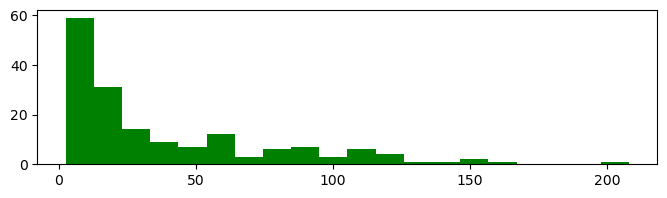

In [58]:
plt.figure(figsize = (8, 2))

plt.hist(df['child_mort'],bins=20,color='green')

#### Lets look at bottom 5% countries with child mortality

In [26]:
print(df['child_mort'].quantile(.95))
bottom_5_cm = df[df['child_mort']>116]

116.0


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446
32,Chad,150.0,36.8,4.53,43.5,1930,6.39,56.5,6.59,897
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662
97,Mali,137.0,22.8,4.98,35.1,1870,4.37,59.5,6.55,708
112,Niger,123.0,22.2,5.16,49.1,814,2.55,58.8,7.49,348
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.00,60.5,5.84,2330
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399


#### Lets look at Correlation between child mortality and other features
#### The features can be split into 2 categories: 
#### health related: child mortality, life exp, health and fertitlity
#### economy related: imports, exports, income, inflation and gdp

<Axes: >

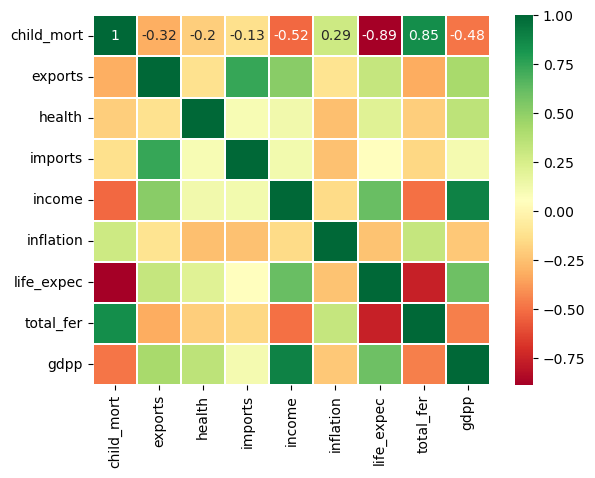

In [43]:
x = df.drop('country',axis=1)
sns.heatmap(x.corr(), cmap ='RdYlGn', linewidths = 0.30, annot = True) 


#### Child mortality has very strong correlation with life expectance and total fertility & also is correlated with economic features such as gdp and income.
#### Running into issues with seaborn upgrade so only the top row %s show. Below is the chart.

In [45]:
round(x.corr(),3)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000,-0.318,-0.200,-0.127,-0.524,0.288,-0.887,0.848,-0.483
exports,-0.318,1.000,-0.114,0.737,0.517,-0.107,0.316,-0.320,0.419
health,-0.200,-0.114,1.000,0.096,0.130,-0.255,0.211,-0.197,0.346
imports,-0.127,0.737,0.096,1.000,0.122,-0.247,0.054,-0.159,0.115
income,-0.524,0.517,0.130,0.122,1.000,-0.148,0.612,-0.502,0.896
inflation,0.288,-0.107,-0.255,-0.247,-0.148,1.000,-0.240,0.317,-0.222
life_expec,-0.887,0.316,0.211,0.054,0.612,-0.240,1.000,-0.761,0.600
total_fer,0.848,-0.320,-0.197,-0.159,-0.502,0.317,-0.761,1.000,-0.455
gdpp,-0.483,0.419,0.346,0.115,0.896,-0.222,0.600,-0.455,1.000


#### Lets look at histograms for all features

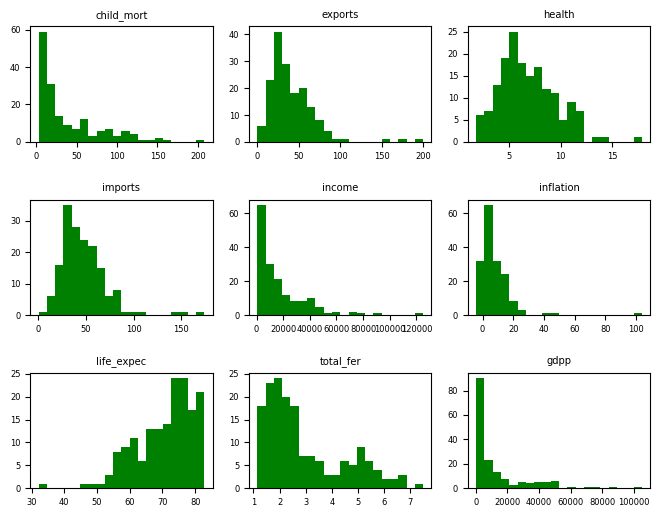

In [66]:
fig, ax = plt.subplots(3, 3,figsize=(8,6))

ax[0,0].hist(df[col_names[1]],bins=20,color='green')
ax[0, 0].set_title(col_names[1])

ax[0,1].hist(df[col_names[2]],bins=20,color='green')
ax[0, 1].set_title(col_names[2])

ax[0,2].hist(df[col_names[3]],bins=20,color='green')
ax[0, 2].set_title(col_names[3])

ax[1,0].hist(df[col_names[4]],bins=20,color='green')
ax[1, 0].set_title(col_names[4])

ax[1,1].hist(df[col_names[5]],bins=20,color='green')
ax[1, 1].set_title(col_names[5])

ax[1,2].hist(df[col_names[6]],bins=20,color='green')
ax[1, 2].set_title(col_names[6])

ax[2,0].hist(df[col_names[7]],bins=20,color='green')
ax[2, 0].set_title(col_names[7])

ax[2,1].hist(df[col_names[8]],bins=20,color='green')
ax[2, 1].set_title(col_names[8])

ax[2,2].hist(df[col_names[9]],bins=20,color='green')
ax[2, 2].set_title(col_names[9])

plt.subplots_adjust(hspace=0.5)  # Increase vertical space between subplots
matplotlib.rcParams.update({'font.size': 6})


#### Lets look at bottom 5% of life expectancy and health

In [71]:
df[df['life_expec']<df['life_expec'].quantile(.05)]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446
64,Guinea-Bissau,114.0,14.9,8.50,35.2,1390,2.97,55.6,5.05,547
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662
87,Lesotho,99.7,39.4,11.10,101.0,2380,4.15,46.5,3.30,1170
94,Malawi,90.5,22.8,6.59,34.9,1030,12.10,53.1,5.31,459
106,Mozambique,101.0,31.5,5.21,46.2,918,7.64,54.5,5.56,419
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399
137,South Africa,53.7,28.6,8.94,27.4,12000,6.35,54.3,2.59,7280
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460


In [72]:
df[df['health']<df['health'].quantile(.05)]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
38,"Congo, Rep.",63.9,85.100,2.46,54.7000,5190,20.70,60.4,4.95,2740
50,Eritrea,55.2,4.790,2.66,23.3000,1420,11.60,61.7,4.61,482
70,Indonesia,33.3,24.300,2.61,22.4000,8430,15.30,69.9,2.48,3110
82,Kuwait,10.8,66.700,2.63,30.4000,75200,11.20,78.2,2.21,38500
107,Myanmar,64.4,0.109,1.97,0.0659,3720,7.04,66.8,2.41,988
115,Oman,11.7,65.700,2.77,41.2000,45300,15.60,76.1,2.90,19300
116,Pakistan,92.1,13.500,2.20,19.4000,4280,10.90,65.3,3.85,1040
123,Qatar,9.0,62.300,1.81,23.8000,125000,6.98,79.5,2.07,70300
154,Turkmenistan,62.0,76.300,2.50,44.5000,9940,2.31,67.9,2.83,4440


#### Lets Look at Income now before we take our 1st stab at data clusters....We can see some countries that are consistently featuring in some of these lists such as Central African Republic, Haiti, Niger etc.

In [75]:
df[df['income']<df['income'].quantile(.05)]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334
63,Guinea,109.0,30.30,4.93,43.2,1190,16.10,58.0,5.34,648
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327
94,Malawi,90.5,22.80,6.59,34.9,1030,12.10,53.1,5.31,459
106,Mozambique,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348
150,Togo,90.3,40.20,7.65,57.3,1210,1.18,58.7,4.87,488


#### Snapshot for each country

In [77]:
print(df.groupby('country').mean().T)

country     Afghanistan  Albania   Algeria   Angola  Antigua and Barbuda  \
child_mort        90.20    16.60     27.30   119.00                10.30   
exports           10.00    28.00     38.40    62.30                45.50   
health             7.58     6.55      4.17     2.85                 6.03   
imports           44.90    48.60     31.40    42.90                58.90   
income          1610.00  9930.00  12900.00  5900.00             19100.00   
inflation          9.44     4.49     16.10    22.40                 1.44   
life_expec        56.20    76.30     76.50    60.10                76.80   
total_fer          5.82     1.65      2.89     6.16                 2.13   
gdpp             553.00  4090.00   4460.00  3530.00             12200.00   

country     Argentina  Armenia  Australia    Austria  Azerbaijan  ...  \
child_mort      14.50    18.10       4.80      4.300       39.20  ...   
exports         18.90    20.80      19.80     51.300       54.30  ...   
health           8.1

### Lets take a stab at our first KNN Model to identify patterns

##### Lets scale the data first

In [81]:
x = df.drop(columns=['country']) ### we dont need this for clustering

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_scaled = pd.DataFrame(x_scaled, columns=x.columns)
print(x_scaled.head())


   child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.291532 -1.138280  0.279088 -0.082455 -0.808245   0.157336   -1.619092   
1   -0.538949 -0.479658 -0.097016  0.070837 -0.375369  -0.312347    0.647866   
2   -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   0.789274    0.670423   
3    2.007808  0.775381 -1.448071 -0.165315 -0.585043   1.387054   -1.179234   
4   -0.695634  0.160668 -0.286894  0.497568  0.101732  -0.601749    0.704258   

   total_fer      gdpp  
0   1.902882 -0.679180  
1  -0.859973 -0.485623  
2  -0.038404 -0.465376  
3   2.128151 -0.516268  
4  -0.541946 -0.041817  


#### Lets plot the points to see if it gives us any idea of how many clusters might be there
##### For this we can use breakdown the data in two principal components and visualize.

### PCA Analysis

In [89]:
pca_model = PCA(n_components=2)
pca_country = pca_model.fit_transform(x_scaled)
pca_df = pd.DataFrame(data = pca_country, columns = ['pc_1', 'pc_2'])
print('Explained variability per principal component: {}'.format(pca_model.explained_variance_ratio_))

Explained variability per principal component: [0.4595174  0.17181626]


#### 63% of the variance explained by 1st 2 components...Lets visualize to get an initial idea of the number of clusters

<Figure size 640x480 with 0 Axes>

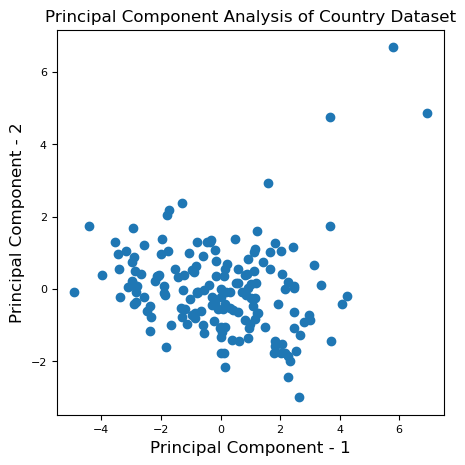

In [91]:
plt.figure()
plt.figure(figsize=(5,5))
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel('Principal Component - 1',fontsize=12)
plt.ylabel('Principal Component - 2',fontsize=12)
plt.title("Principal Component Analysis of Country Dataset",fontsize=12)
plt.scatter(x = pca_df['pc_1'],y=pca_df['pc_2'])

#### Looks like 2 clusters and then outliers which could be the 3rd cluster...Lets start with 3 clusters and then we can tune the parameters.

In [99]:
k = 3
model1 = KMeans(n_clusters=k,init = 'k-means++',n_init='auto')
model1.fit(x_scaled)
model1
inertia = model1.inertia_
print(inertia)

831.4428600464844


C:\Users\sorab\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


#### Lets plot an elbow grap to get the right number of clusters

C:\Users\sorab\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sorab\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sorab\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sorab\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

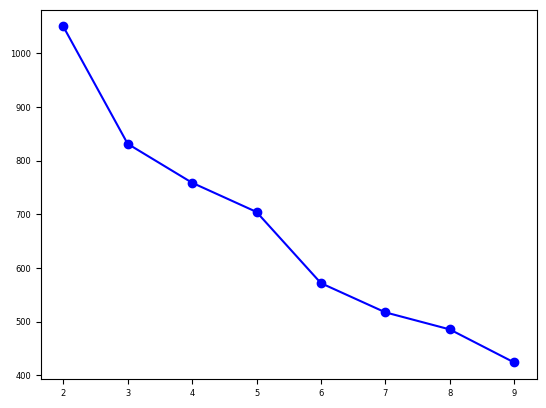

In [103]:
inertia = []

K = range(2,10)
for k in K:
    k_means = KMeans(n_clusters=k,init = 'k-means++',n_init='auto')
    k_means.fit(x_scaled)
    inertia.append(k_means.inertia_)
plt.plot(K, inertia, 'bo-')


#### Surpirisingly the plot looks different in that it has 2 elbows: 1 at 3 (which was our initial guess looking at data and another at 6)
#### Lets go with 6 clusters to help filter the number of countries in each cluster to a manageable number to build target plans.

In [104]:
kmeans = KMeans(n_clusters=6)
df['Cluster'] = kmeans.fit_predict(x_scaled)
df.head()

C:\Users\sorab\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sorab\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,5
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2


#### Lets look at child mortality rates by cluster to see if there is a pattern...
#### we may be intersted in seeing the distribution of Countries with Child Mortality rate > 115 (our initial bottom 5% cutoff)

<Axes: xlabel='child_mort', ylabel='Cluster'>

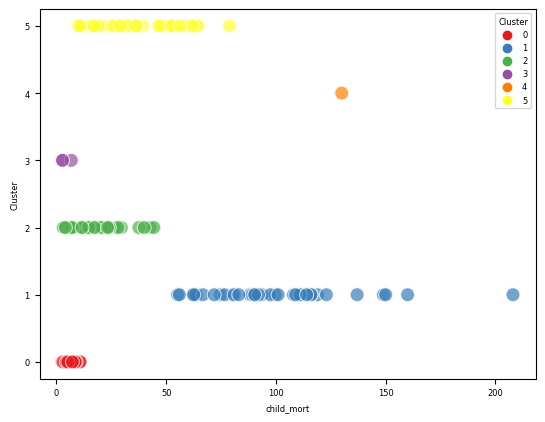

In [106]:
sns.scatterplot(data=df, x='child_mort', y='Cluster', hue='Cluster', palette='Set1', alpha=0.7, s=100)


#### Countries with Cild Mortality Rate> 50 are in CLuster 1 and Cluster 4. Lets look deeper into Cluster 1 & 4 with their income distribution.

<Axes: xlabel='income', ylabel='Cluster'>

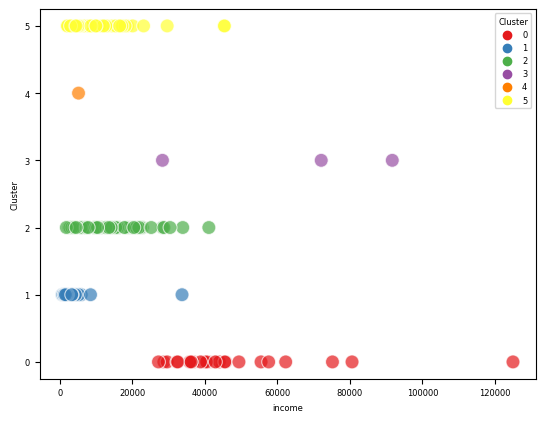

In [108]:
sns.scatterplot(data=df, x='income', y='Cluster', hue='Cluster', palette='Set1', alpha=0.7, s=100)


#### Looks like Cluster 1 and Cluster 4 have low income also.Cluster 4 looks really small. Lets see what countries are there.

In [109]:
df[df['Cluster']==4]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.0,60.5,5.84,2330,4


#### Only 1 country in Cluster 4 and it looks similar to Cluster 1 which we are intersted in (high Child Mortality and low income). Lets combine Cluster 1 and Cluster 4.

In [111]:
df['Cluster'] = df['Cluster'].replace(4, 1)


#### Now lets look at how Cluster 1 countries do on income and child mortality.

<Axes: xlabel='child_mort', ylabel='income'>

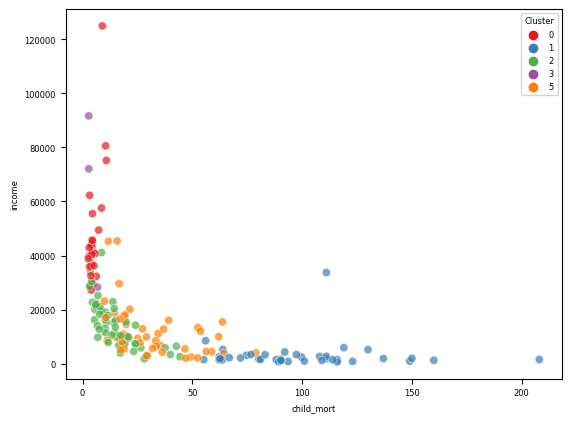

In [113]:
sns.scatterplot(data=df, x='child_mort', y='income', hue='Cluster', palette='Set1', alpha=0.7)


#### Bingo....Cluster 1 can clearly be identified with bule dots having high child mortality and low income.

#### Lets also look at exports and GDP.

<Axes: xlabel='exports', ylabel='gdpp'>

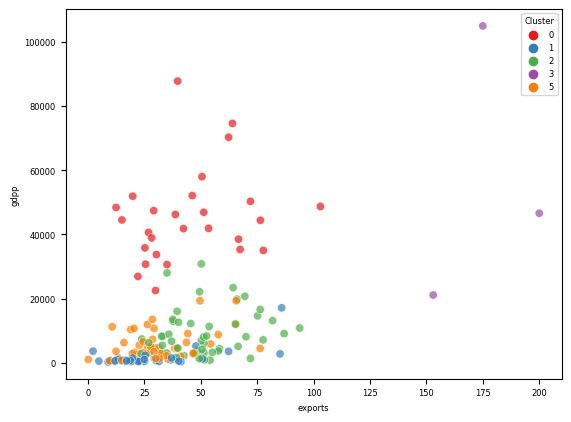

In [115]:
sns.scatterplot(data=df, x='exports', y='gdpp', hue='Cluster', palette='Set1', alpha=0.7)


#### Again these countries have low exports and low GDP. So Clearly Cluster 1 is what we need to deep dive further before we put together an action plan to target these countries. Lets Look at the countries in Cluster 1.

In [116]:
df[df['Cluster']==1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,1
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,1
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,1
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,1
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,1
28,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,1
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,1
32,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,1
36,Comoros,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,1
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334,1


In [121]:
print(df[df['Cluster']==1].shape)

(41, 11)


#### Finally lets look at mean values for all clusters before we close out the analysis

In [120]:
x1 = df.drop('country',axis=1)
x1.groupby('Cluster').mean().T

Cluster,0,1,2,3,5
child_mort,5.100000,98.224390,15.311538,4.133333,32.218182
exports,44.848148,27.692927,50.038462,176.000000,31.565659
health,9.361111,6.377073,7.086731,6.793333,5.343636
imports,37.981481,43.263415,60.005769,156.666667,32.751498
income,46833.333333,3010.560976,14619.807692,64033.333333,11884.090909
inflation,2.891963,11.796463,3.931115,2.468000,11.954682
life_expec,80.437037,58.756098,73.901923,81.433333,70.790909
total_fer,1.838519,5.206098,2.015385,1.380000,2.733636
gdpp,45322.222222,1488.341463,8814.730769,57566.666667,5664.227273


### Summary:
#### For this project we looked at a dataset that had verious socio-economic and health factors for 167 countries. The goal of the project was to identify a subset of countries to focus on. For this, after an initial analysis we ran K_Means unsupervised learning algorith to identify the clusters in the data.Based on the analysis of Clusters we were able to see that Cluster 1 had a set of 41 countries which met our requirements as you can see from the table above.

#### These countries have high child mortality rates, low life expectancy, low income and GDP and high rate of total_fertility.